# **Personal Fitness Tracker** 🏋️‍♂️📊  

### **Project Overview**  
This project focuses on building a **Personal Fitness Tracker** that analyzes user **exercise data** to provide insights and predict **calories burned** based on various **physiological** and **activity-related parameters**.  

### **Objectives**  
✅ **Analyze exercise data** to extract meaningful insights.  
✅ **Predict calories burned** using machine learning models.  
✅ **Enhance user experience** with an interactive, data-driven system.  
✅ **Develop a user-friendly interface** for real-time fitness tracking.  

### **Key Features**  
🔹 **Exploratory Data Analysis (EDA)** to understand trends & correlations.  
🔹 **Feature Engineering** (e.g., BMI calculation, age categorization).  
🔹 **Machine Learning Models** for calorie prediction.  
🔹 **Hyperparameter Tuning** for model optimization.  
🔹 **Interactive UI using Streamlit** for user engagement.  

The goal is to create an **intelligent** and **personalized fitness tracking system** that helps users optimize their **exercise routines** based on **data-driven insights**! 🚀  

# **Chronological Workflow of the Project**

## 1️⃣ Data Collection & Loading  
**Imported exercise dataset** for analysis.  

## 2️⃣ Data Preprocessing  
**Handled missing values**, corrected data types.  

## 3️⃣ Feature Engineering  
**Created BMI**, categorized age, height, weight.  

## 4️⃣ Exploratory Data Analysis (EDA)  
**Plotted distributions**, checked correlations.  

## 5️⃣ Outlier Detection  
**Used boxplots** for numeric feature analysis.  

## 6️⃣ Train-Test Split  
**Split dataset** for modeling with a fixed random seed.  

## 7️⃣ Feature Encoding  
**Applied one-hot encoding** for categorical variables.  

## 8️⃣ Model Selection & Training  
Trained **Linear Regression, Decision Tree, Random Forest, SVR, and Neural Network** models.  

## 9️⃣ Hyperparameter Tuning  
Used **GridSearchCV** to optimize model parameters.  

## 🔟 Model Evaluation  
**Compared models** using MSE, RMSE, and MAE on train/test data.  

## 1️⃣1️⃣ Performance Visualization  
**Plotted error metrics** for better model selection.  

## 1️⃣2️⃣ Final Model Selection  
**Identified the best-performing model** based on accuracy.  

## 1️⃣3️⃣ Prediction Testing  
**Used sample inputs** to verify model predictions.  

## 1️⃣4️⃣ Interactive UI Development  
**Built a Streamlit app** for user predictions.  

## 1️⃣5️⃣ Future Enhancements  
Planned **improvements** for better user engagement & insights.  

Each step systematically refined the **Personal Fitness Tracker**, making it an intelligent and user-friendly **fitness analysis tool**! 🚀  

## Importing Libraries 📚

In [1]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

## Defining File Paths 📁

In [2]:
dir_path = "E:/NEW_FOLDER/Projects_Java_Python/Personal Fitness Tracker in Python3/datasets"
calories_path = os.path.join(dir_path, "calories.csv")
exercise_path = os.path.join(dir_path, "exercise.csv")

## Loading the Dataset 📂

In [3]:
calories = pd.read_csv(calories_path)
exercise = pd.read_csv(exercise_path)

## Data Overview & Preprocessing 🔍

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
calories.shape

(15000, 2)

In [7]:
exercise.shape

(15000, 8)

In [8]:
df = exercise.merge(calories, on = "User_ID")

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df.shape

(15000, 9)

In [11]:
print(df.describe(include="all"))  # Include categorical columns

             User_ID  Gender           Age        Height        Weight  \
count   1.500000e+04   15000  15000.000000  15000.000000  15000.000000   
unique           NaN       2           NaN           NaN           NaN   
top              NaN  female           NaN           NaN           NaN   
freq             NaN    7553           NaN           NaN           NaN   
mean    1.497736e+07     NaN     42.789800    174.465133     74.966867   
std     2.872851e+06     NaN     16.980264     14.258114     15.035657   
min     1.000116e+07     NaN     20.000000    123.000000     36.000000   
25%     1.247419e+07     NaN     28.000000    164.000000     63.000000   
50%     1.499728e+07     NaN     39.000000    175.000000     74.000000   
75%     1.744928e+07     NaN     56.000000    185.000000     87.000000   
max     1.999965e+07     NaN     79.000000    222.000000    132.000000   

            Duration    Heart_Rate     Body_Temp      Calories  
count   15000.000000  15000.000000  15000.0000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
print(df.isnull().sum())  # Count missing values for each column

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [14]:
print(df.duplicated().sum())  # Count duplicate rows

0


In [15]:
print(df.nunique())  # Number of unique values per column

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64


## Segregate Numeric & Categorical Columns 📊

In [16]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')
Categorical Columns: Index(['Gender'], dtype='object')


## Pairplot Analysis 📊

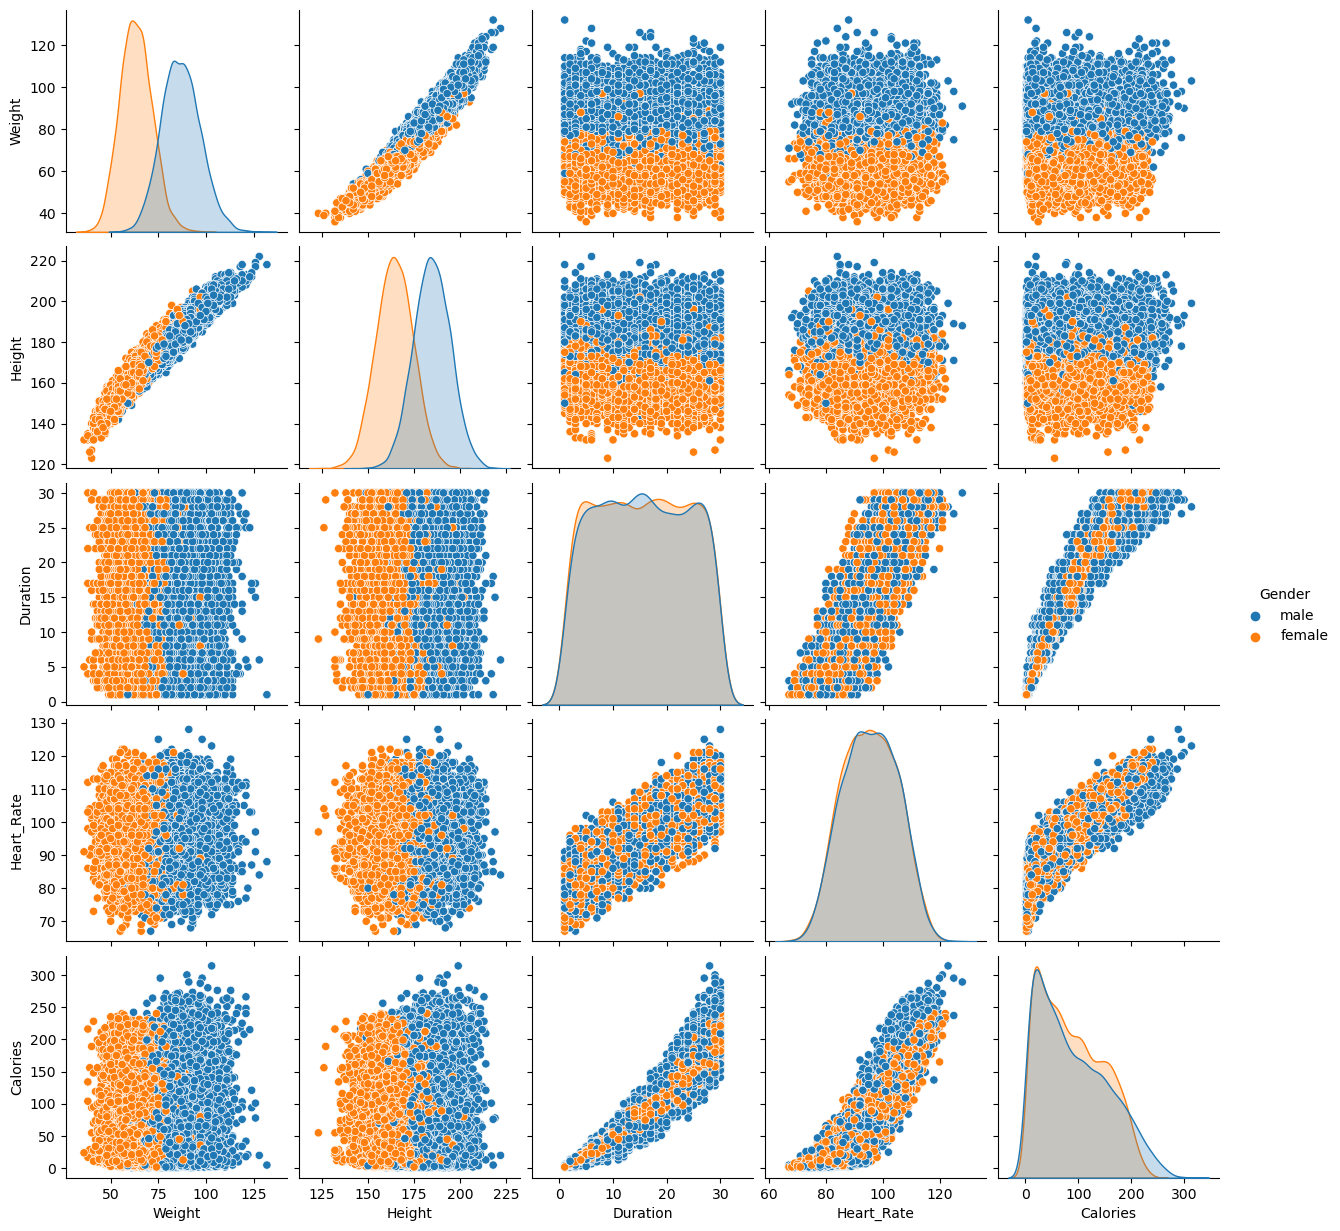

In [17]:
sns.pairplot(df[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

## BMI Calculation ⚖️

In [18]:
# Calculate BMI
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)
df["BMI"] = round(df["BMI"], 1)  

## Splitting of DataFrame into Train and Test 🔀

In [19]:
# Split the DataFrame into training and testing sets (80% train, 20% test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Check split sizes
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")

Training set shape: (12000, 10)
Testing set shape: (3000, 10)


## KDE Distribution Analysis 📈

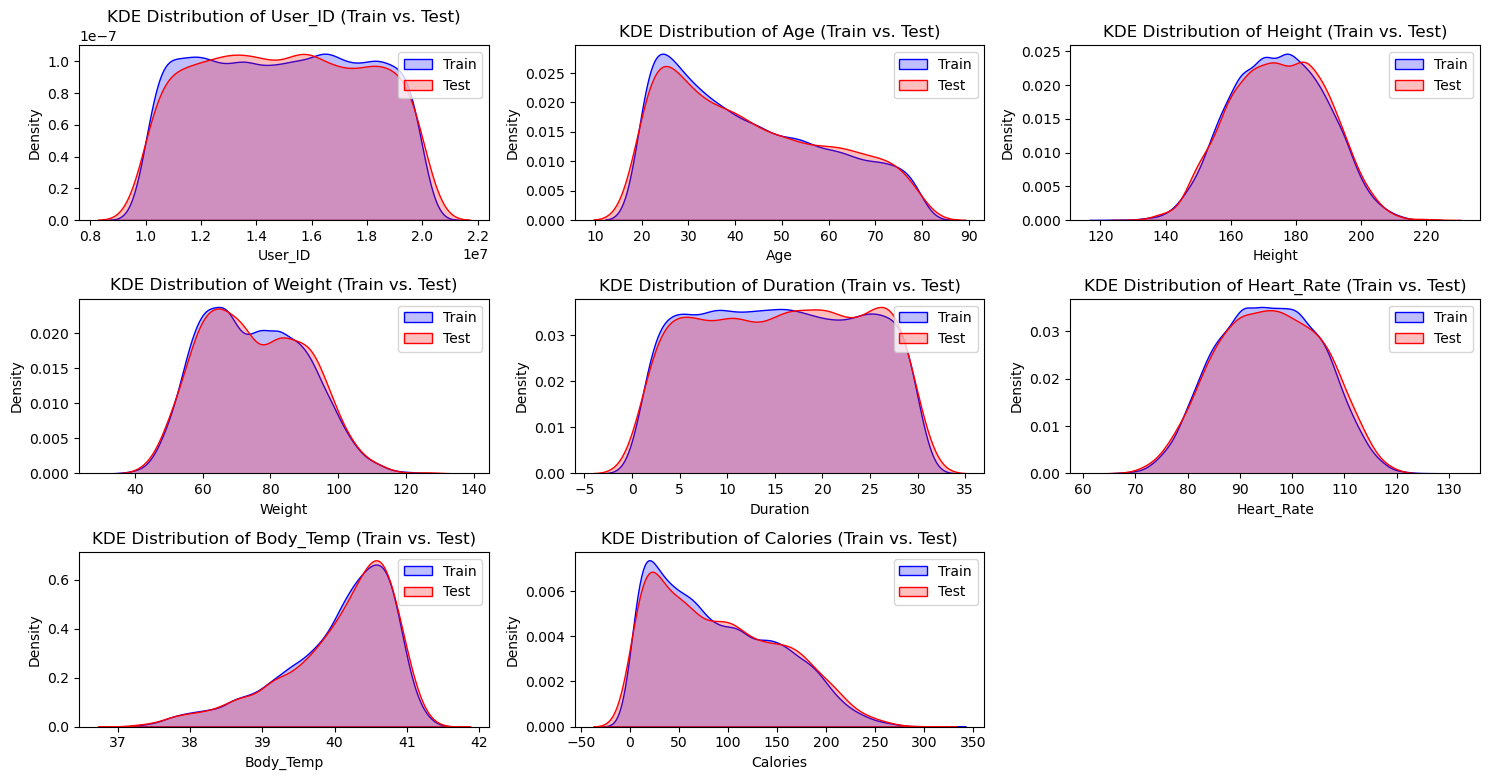

In [20]:
# Set figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot KDE
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid based on the number of plots
    sns.kdeplot(df_train[col].dropna(), label="Train", color="blue", shade=True)
    sns.kdeplot(df_test[col].dropna(), label="Test", color="red", shade=True)

    plt.title(f"KDE Distribution of {col} (Train vs. Test)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Min & Max Values of Numerical Columns 📊

In [21]:
# Compute min and max for numerical columns in df_train
min_max_values_train = df_train[num_cols].agg(["min", "max"])

# Display results
print(min_max_values_train)

      User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
min  10001159   20   123.0    36.0       1.0        67.0       37.1       1.0
max  19999394   79   218.0   132.0      30.0       128.0       41.5     314.0


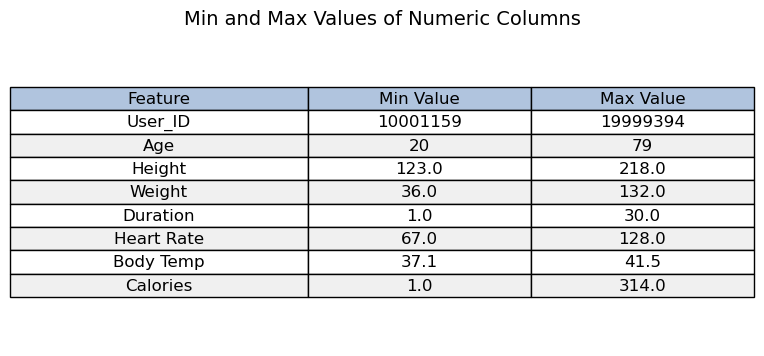

In [22]:
import matplotlib.pyplot as plt

# Data for the table
data = [
    ["Feature", "Min Value", "Max Value"],
    ["User_ID", 10001159, 19999394],
    ["Age", 20, 79],
    ["Height", 123.0, 218.0],
    ["Weight", 36.0, 132.0],
    ["Duration", 1.0, 30.0],
    ["Heart Rate", 67.0, 128.0],
    ["Body Temp", 37.1, 41.5],
    ["Calories", 1.0, 314.0]
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size for better readability
ax.axis("tight")
ax.axis("off")

# Create table with proper alignment
table = ax.table(cellText=data, cellLoc="center", loc="center", colWidths=[0.4, 0.3, 0.3])

# Adjust font sizes
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.4)  # Scale for better visibility

# Style header row
for j in range(3):
    table[0, j].set_facecolor("#B0C4DE")  # Light blue for header
    table[0, j].set_text_props(color="black")

# Alternate row shading for readability
for i in range(1, len(data)):
    if i % 2 == 0:
        for j in range(3):
            table[i, j].set_facecolor("#F0F0F0")  # Light gray for alternate rows

# Title with normal font
plt.title("Min and Max Values of Numeric Columns", fontsize=14, pad=10)

plt.show()

## Categorizing Numerical Features 🏷️

In [23]:
# Define bins and labels for each numerical column
age_labels = ["Young", "Middle-Aged", "Old"]
df_train["age_groups"] = pd.cut(df_train["Age"], bins=[20, 40, 60, 80], right=False, labels=age_labels)

height_labels = ["Short", "Average", "Tall"]
df_train["height_groups"] = pd.cut(df["Height"], bins=[120, 160, 180, 230], right=False, labels=height_labels)

weight_labels = ["Underweight", "Normal", "Overweight", "Obese"]
df_train["weight_groups"] = pd.cut(df_train["Weight"], bins=[35, 55, 75, 95, 140], right=False, labels=weight_labels)

bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
df_train["bmi_groups"] = pd.cut(df_train["BMI"], bins=[10, 18.5, 24.9, 29.9, 40], right=False, labels=bmi_labels)

duration_labels = ["Short", "Moderate", "Long"]
df_train["duration_groups"] = pd.cut(df_train["Duration"], bins=[0, 10, 20, 30], right=False, labels=duration_labels)

heart_rate_labels = ["Low", "Normal", "High"]
df_train["heart_rate_groups"] = pd.cut(df_train["Heart_Rate"], bins=[60, 80, 100, 130], right=False, labels=heart_rate_labels)

body_temp_labels = ["Low", "Normal", "High"]
df_train["body_temp_groups"] = pd.cut(df_train["Body_Temp"], bins=[36, 37, 39, 42], right=False, labels=body_temp_labels)

# Display the categorized data
df_train.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,age_groups,height_groups,weight_groups,bmi_groups,duration_groups,heart_rate_groups,body_temp_groups
9839,16554569,male,37,179.0,77.0,7.0,81.0,39.5,17.0,24.0,Young,Average,Overweight,Normal,Short,Normal,High
9680,18903739,male,23,195.0,87.0,26.0,110.0,40.5,167.0,22.9,Young,Tall,Overweight,Normal,Long,High,High
7093,11938260,male,33,181.0,77.0,12.0,88.0,40.1,40.0,23.5,Young,Tall,Overweight,Normal,Moderate,Normal,High
11293,14116395,female,66,156.0,54.0,9.0,77.0,39.5,34.0,22.2,Old,Short,Underweight,Normal,Short,Low,High
820,13815395,female,32,144.0,49.0,5.0,90.0,39.0,23.0,23.6,Young,Short,Underweight,Normal,Short,Normal,High


## Distribution of Categorical Features 📊

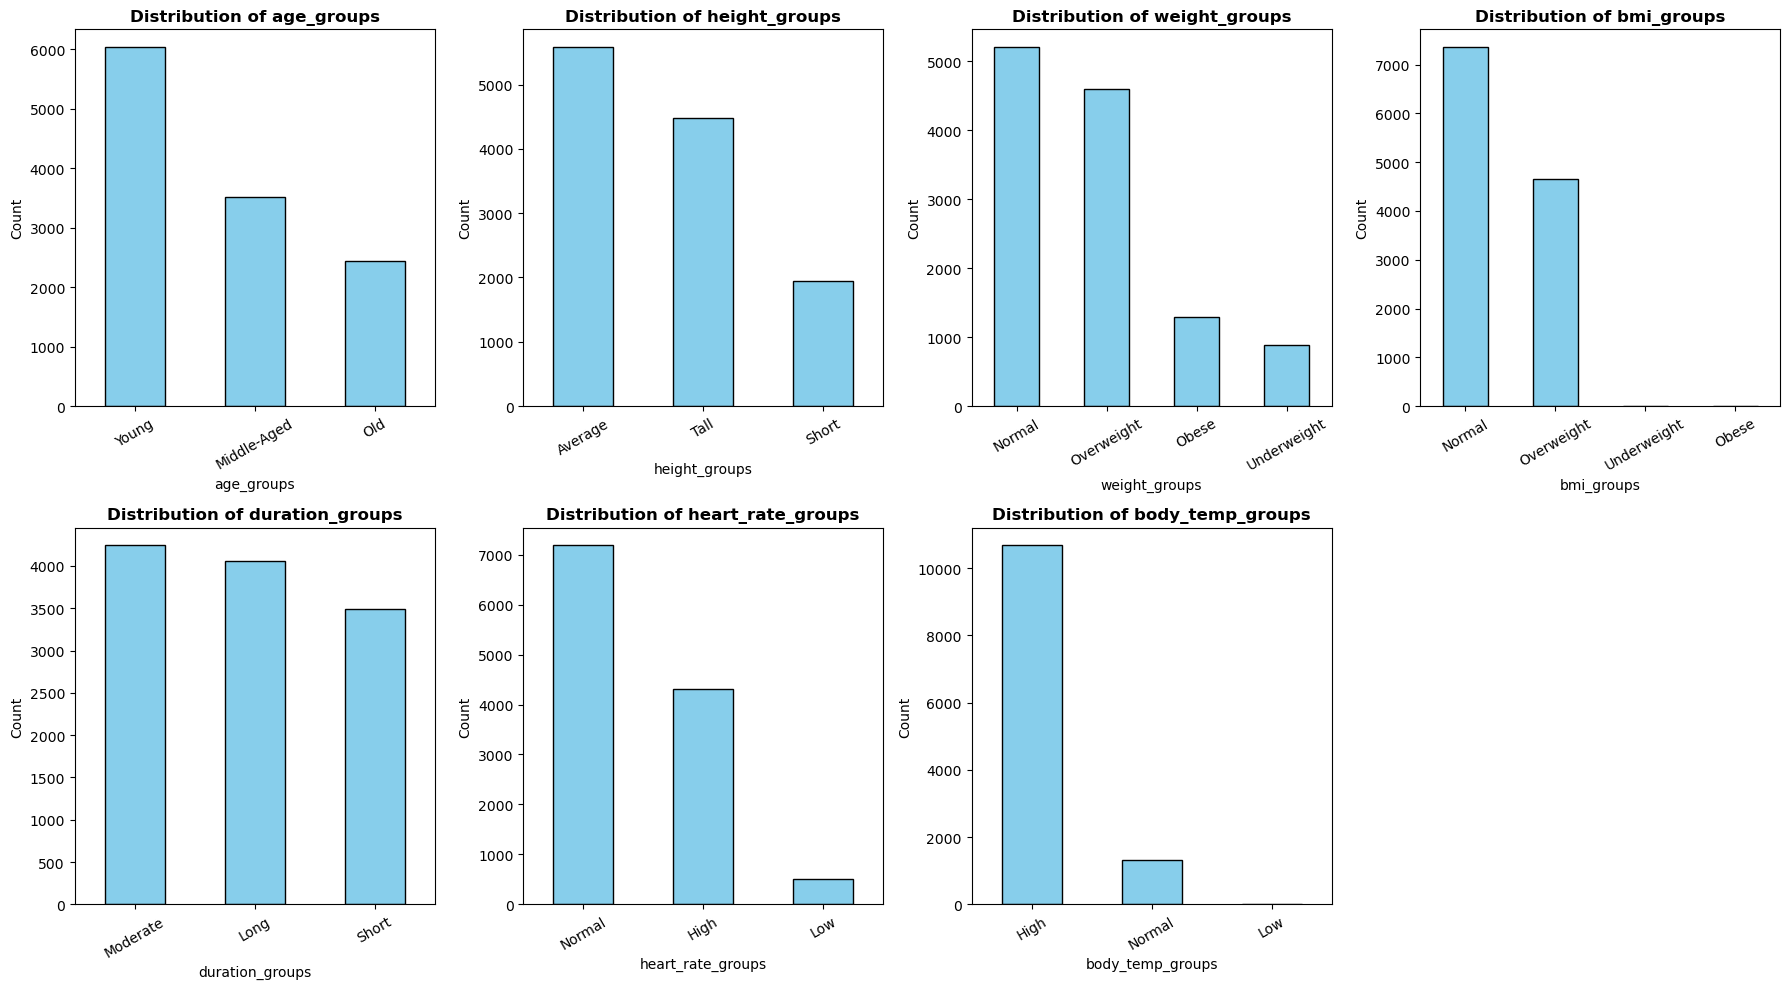

In [24]:
# List of categorical columns
cat_cols = ["age_groups", "height_groups", "weight_groups", "bmi_groups", 
            "duration_groups", "heart_rate_groups", "body_temp_groups"]

# Set figure size
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))  # Adjust grid size based on the number of categories
axes = axes.flatten()  # Flatten to iterate easily

# Loop through each categorical column and plot
for i, col in enumerate(cat_cols):
    df_train[col].value_counts().plot(kind="bar", ax=axes[i], color="skyblue", edgecolor="black")

    # Set titles and labels
    axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

    # Rotate x-axis labels for readability
    axes[i].tick_params(axis="x", rotation=30)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## ## Gender Distribution 🚻

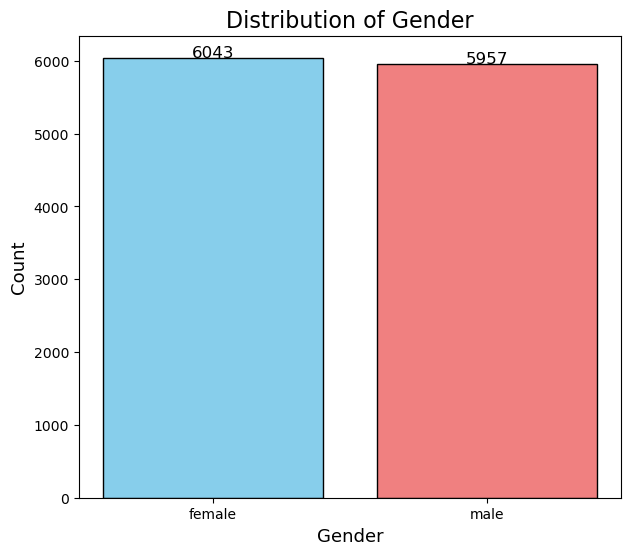

In [25]:
# Count the occurrences of each gender category
gender_counts = df_train["Gender"].value_counts()

# Create a bar plot with a larger figure size
plt.figure(figsize=(7, 6))
plt.bar(gender_counts.index, gender_counts.values, color=["skyblue", "lightcoral"], edgecolor="black")

# Add labels and title
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.title("Distribution of Gender", fontsize=16)  # Title is larger but not bold

# Add text labels above bars with more spacing
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 5, str(count), ha="center", fontsize=12)  # Increased gap

# Show the plot
plt.show()

## Outlier Detection using Box Plots 📦

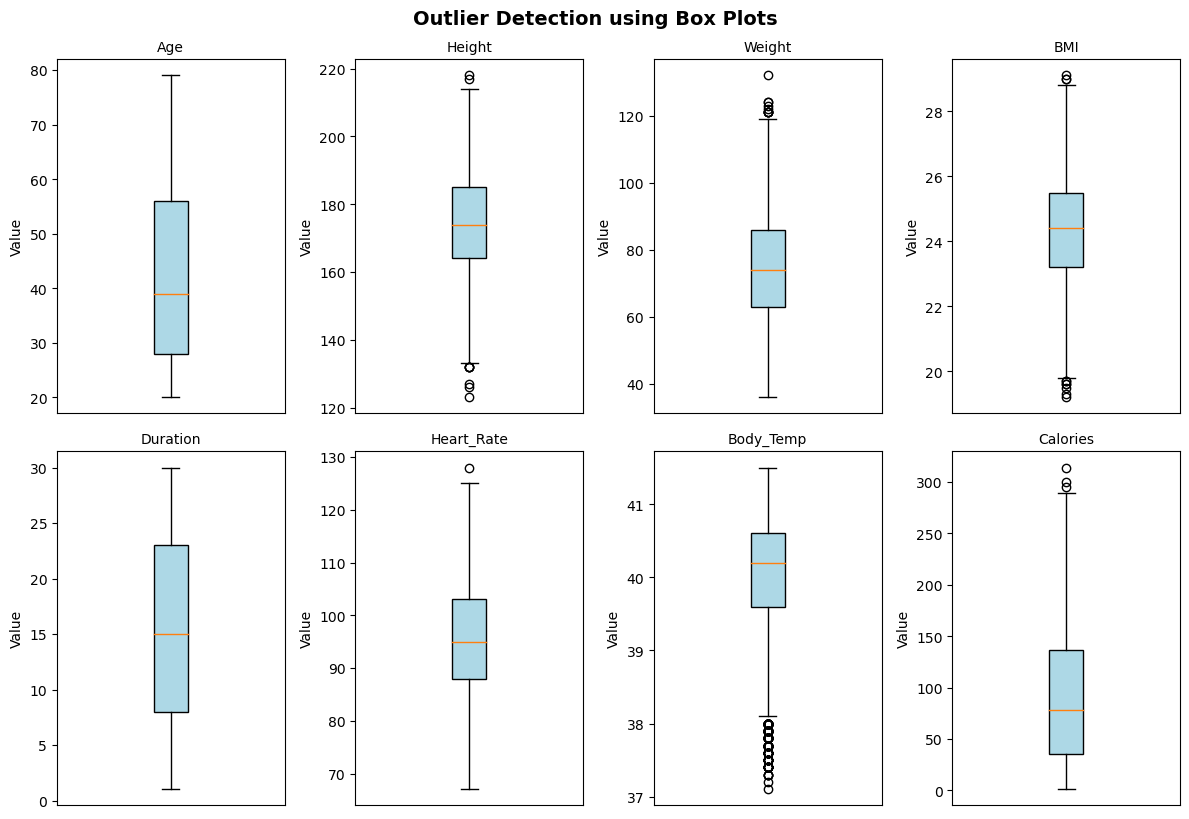

In [26]:
# List of numeric columns
num_cols = ["Age", "Height", "Weight", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create subplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i) 
    plt.boxplot(df_train[col], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"{col}", fontsize=10)
    plt.xticks([]) 
    plt.ylabel("Value")

# Adjust layout and show plot
plt.tight_layout()
plt.suptitle("Outlier Detection using Box Plots", fontsize=14, fontweight="bold", y=1.02)
plt.show()

## ## Filtering Normal and Overweight BMI Categories ⚖️

In [27]:
# Filter dataset for "Normal" and "Overweight" BMI categories
ds = df_train[df_train["bmi_groups"].isin(["Normal", "Overweight"])]

# Count occurrences of each BMI category
bmi_counts = ds["bmi_groups"].value_counts().reset_index()

# Rename columns for clarity
bmi_counts.columns = ["bmi_groups", "Count"]

# Display the result
print(bmi_counts)

    bmi_groups  Count
0       Normal   7354
1   Overweight   4646
2  Underweight      0
3        Obese      0


## Distribution of Normal vs Overweight BMI 📊

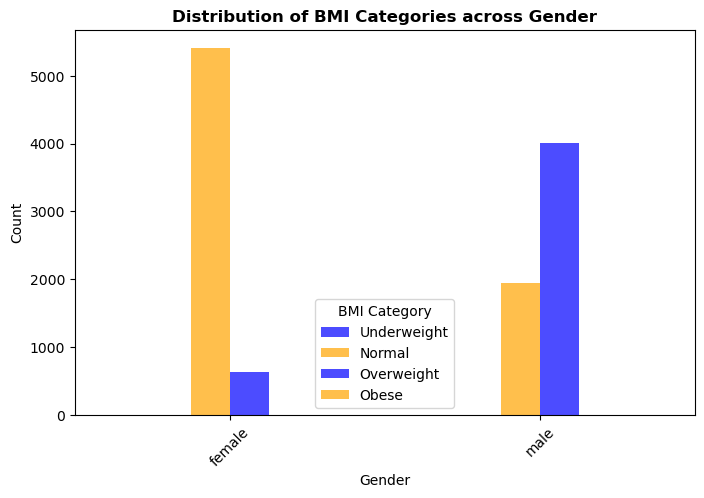

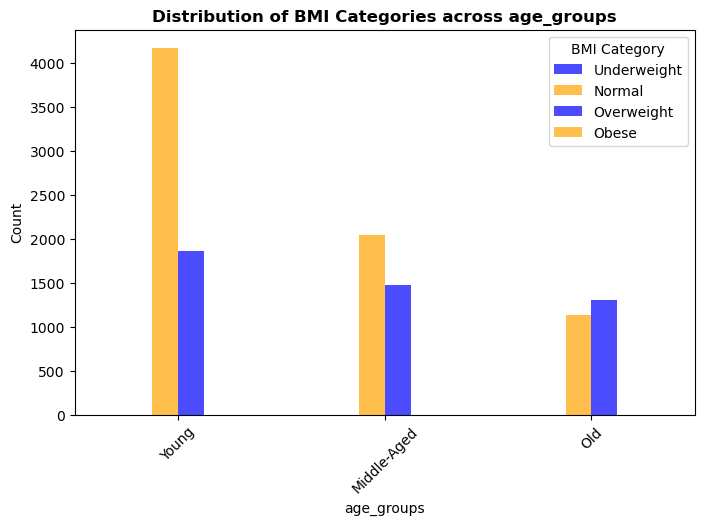

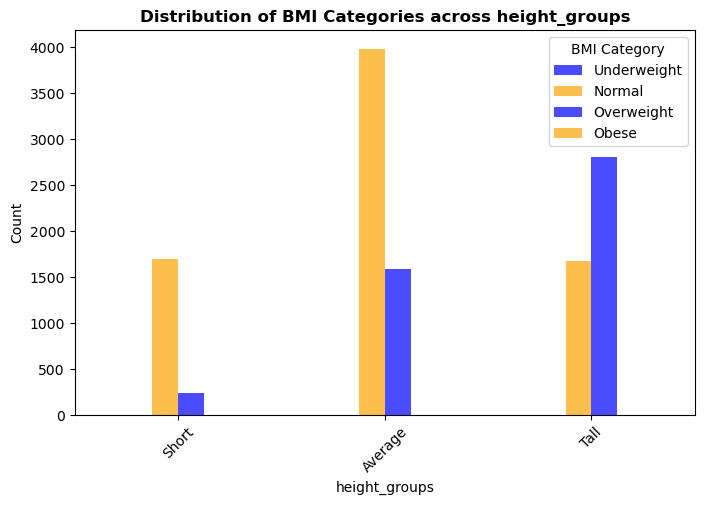

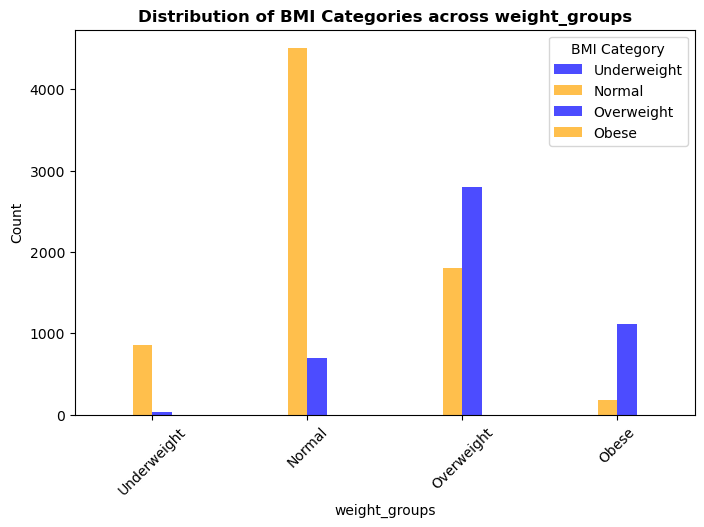

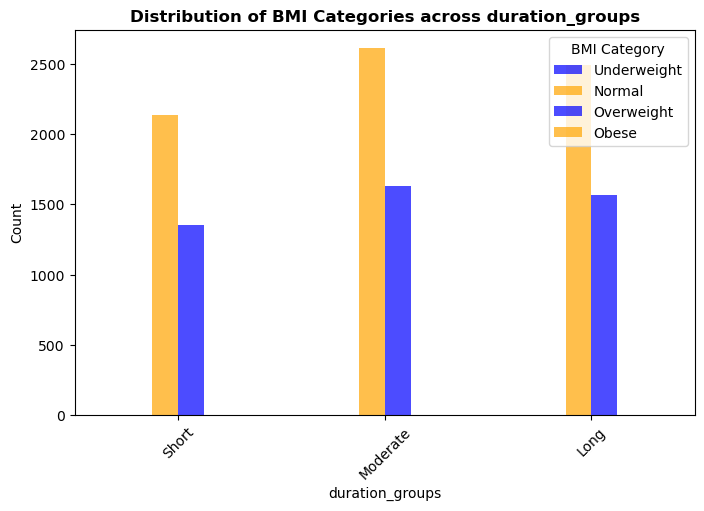

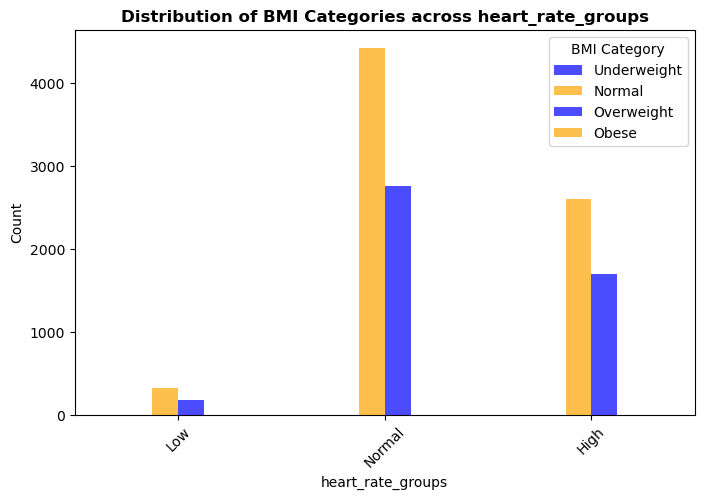

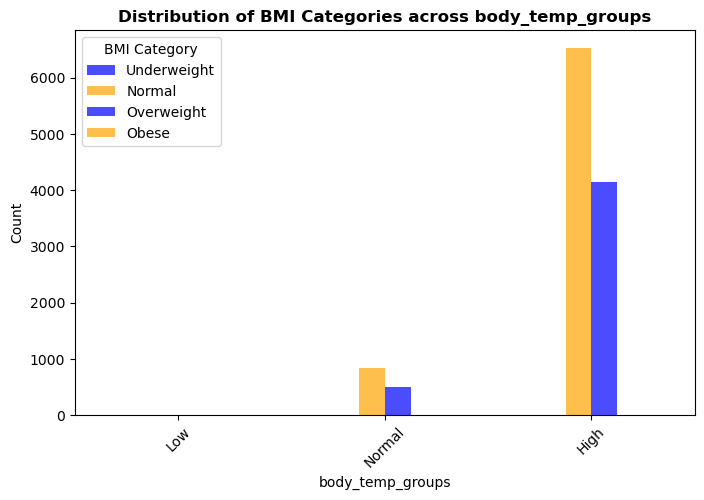

In [28]:
# Define categorical variables to compare with BMI
cat_cols = ["Gender", "age_groups", "height_groups", "weight_groups", 
            "duration_groups", "heart_rate_groups", "body_temp_groups"]

# Filter dataset for "Normal" and "Overweight" BMI categories
ds = df_train[(df_train["bmi_groups"] == "Normal") | (df_train["bmi_groups"] == "Overweight")]

# Loop through categorical variables and plot bar charts
for col in cat_cols:
    # Count occurrences of BMI categories within each categorical variable
    bmi_counts = ds.groupby([col, "bmi_groups"]).size().unstack()

    # Create bar plot
    ax = bmi_counts.plot(kind="bar", figsize=(8, 5), color=["blue", "orange"], alpha=0.7)

    # Add title and labels
    plt.title(f"Distribution of BMI Categories across {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.legend(title="BMI Category")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="center")  # Rotates labels at 45 degrees and aligns to the right

    # Show plot
    plt.show()

## BMI Distribution across Categorical Variables 📊

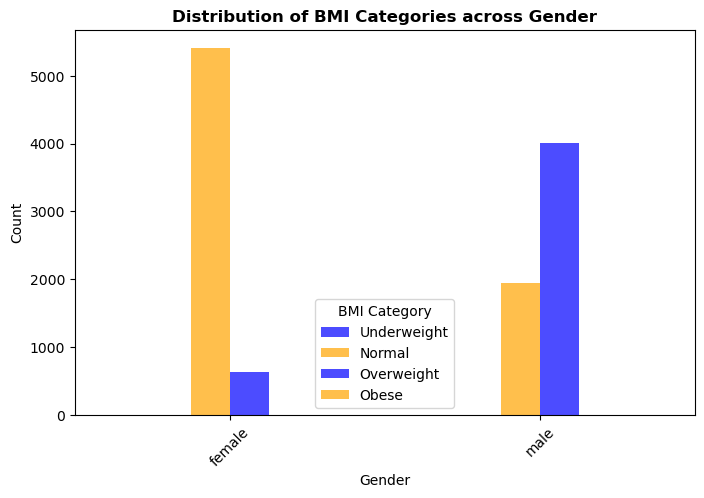

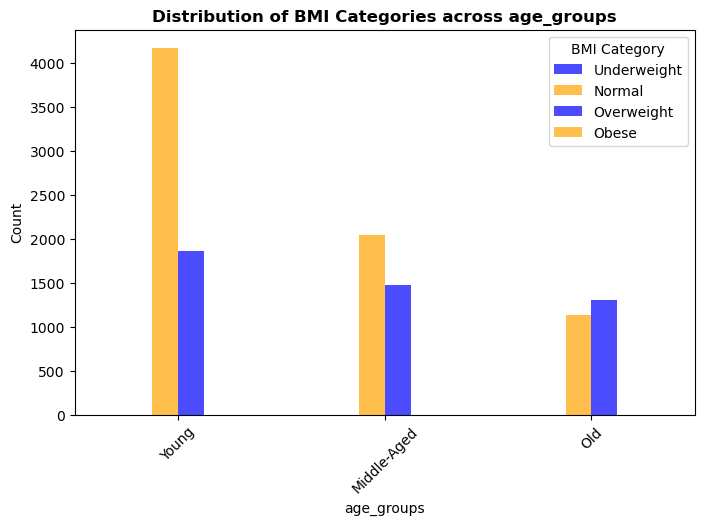

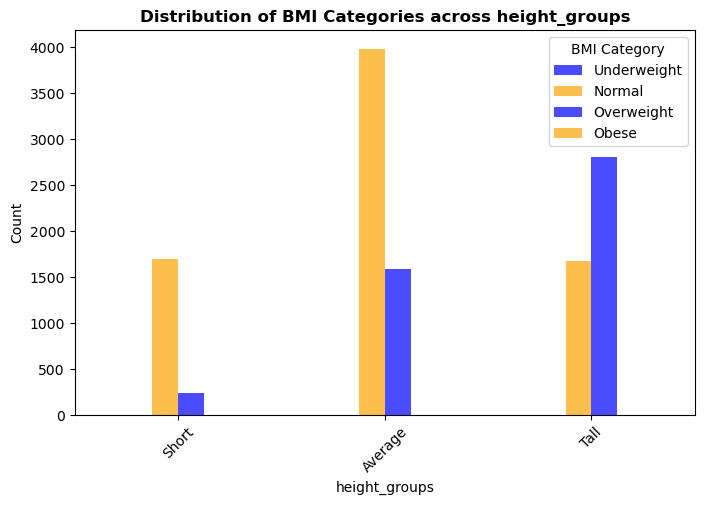

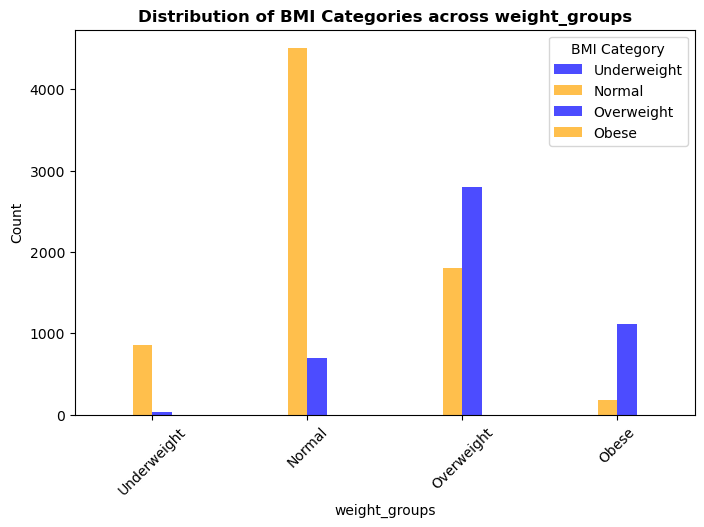

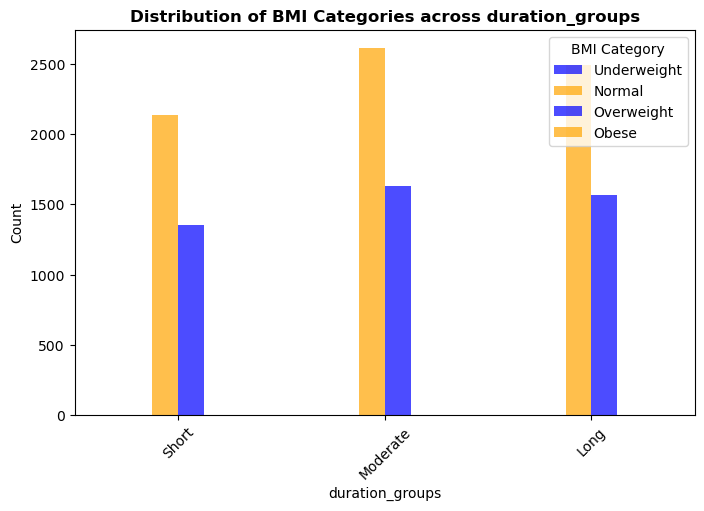

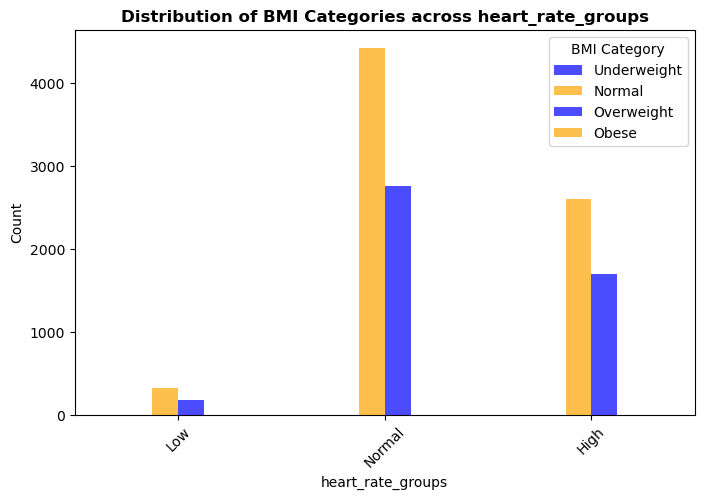

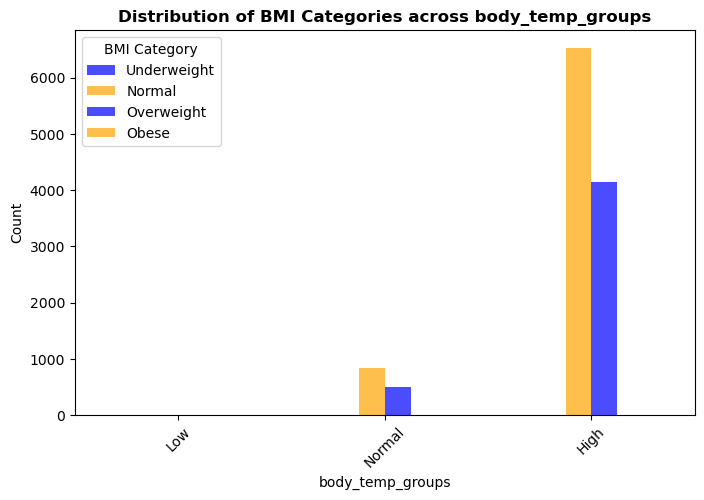

In [29]:
# Define categorical variables to compare with BMI
cat_cols = ["Gender", "age_groups", "height_groups", "weight_groups", 
            "duration_groups", "heart_rate_groups", "body_temp_groups"]

# Filter dataset for "Normal" and "Overweight" BMI categories
ds = df_train[(df_train["bmi_groups"] == "Normal") | (df_train["bmi_groups"] == "Overweight")]

# Loop through categorical variables and plot bar charts
for col in cat_cols:
    # Count occurrences of BMI categories within each categorical variable
    bmi_counts = ds.groupby([col, "bmi_groups"]).size().unstack()

    # Create bar plot
    ax = bmi_counts.plot(kind="bar", figsize=(8, 5), color=["blue", "orange"], alpha=0.7)

    # Add title and labels
    plt.title(f"Distribution of BMI Categories across {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.legend(title="BMI Category")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="center")  # Rotates labels at 45 degrees and aligns to the right

    # Show plot
    plt.show()

## Feature Correlation Heatmap 🔥

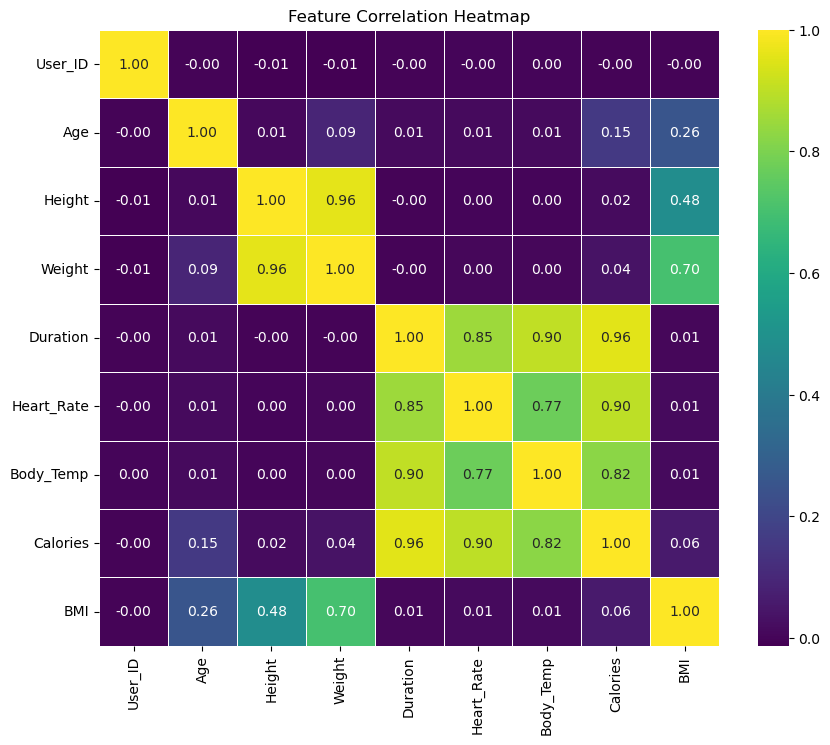

In [30]:
# Compute correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Selection 🎯

In [31]:
# Select relevant features
selected_features = ["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]

# Apply feature selection
df_train = df_train[selected_features]
df_test = df_test[selected_features]  # Ensure consistency in test set

## One-Hot Encoding 🏷️

In [32]:
# Perform One-Hot Encoding for categorical variables
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

## Splitting Features and Target 🎯

In [33]:
X_train = df_train.drop("Calories" , axis = 1)
y_train = df_train["Calories"]

X_test = df_test.drop("Calories" , axis = 1)
y_test = df_test["Calories"]

## Model Selection & Hyperparameter Tuning 🤖

In [34]:
# Define parameter grids for tuning
param_grids = {
    "Random Forest Regressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "Decision Tree Regressor": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Regressor": {
        "C": [0.1, 1, 10],
        "epsilon": [0.01, 0.1, 1]
    },
    "Neural Network Regressor": {
        "hidden_layer_sizes": [(32,), (64, 32), (128, 64, 32)],
        "alpha": [0.0001, 0.001, 0.01]
    }
}

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Neural Network Regressor": MLPRegressor(max_iter=1000, random_state=42)
}

best_models = {}

# Train and tune models
for name, model in models.items():
    if name in param_grids:
        print(f"Tuning {name} using GridSearchCV...")
        grid_search = GridSearchCV(model, param_grids[name], scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Params for {name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[name] = model  # No tuning needed for Linear Regression

Tuning Random Forest Regressor using GridSearchCV...
Best Params for Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}
Tuning Decision Tree Regressor using GridSearchCV...
Best Params for Decision Tree Regressor: {'max_depth': None, 'min_samples_split': 10}
Tuning Support Vector Regressor using GridSearchCV...
Best Params for Support Vector Regressor: {'C': 10, 'epsilon': 1}
Tuning Neural Network Regressor using GridSearchCV...
Best Params for Neural Network Regressor: {'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32)}


## Model Performance Evaluation 📊

                           MSE Train    MSE Test  RMSE Train  RMSE Test  \
Neural Network Regressor   11.034620   11.209767    3.321840   3.348099   
Random Forest Regressor     1.959158   13.223657    1.399699   3.636435   
Decision Tree Regressor     8.898689   29.604025    2.983067   5.440958   
Support Vector Regressor   46.624297   50.597905    6.828199   7.113220   
Linear Regression         128.489828  133.871416   11.335335  11.570282   

                          MAE Train  MAE Test  
Neural Network Regressor   2.291354  2.290409  
Random Forest Regressor    0.925713  2.461410  
Decision Tree Regressor    1.946288  3.620667  
Support Vector Regressor   4.279398  4.410013  
Linear Regression          8.324607  8.461341  


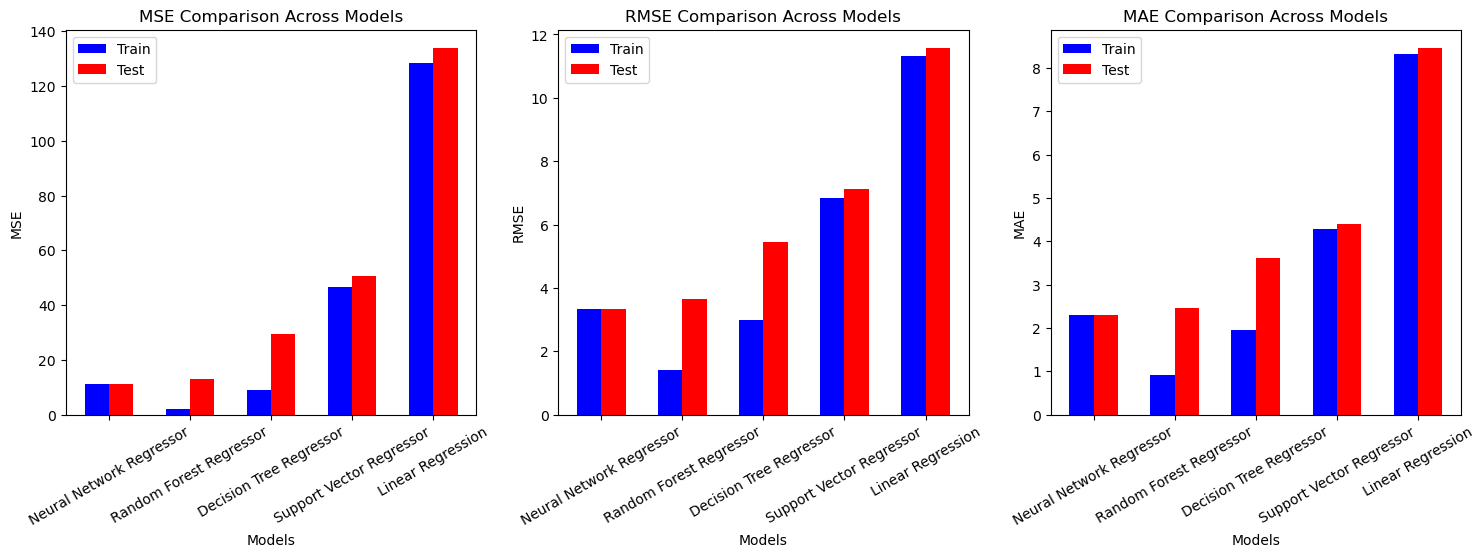

In [35]:
# Evaluate models
results = {}

for name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results[name] = {
        "MSE Train": mse_train, "MSE Test": mse_test,
        "RMSE Train": rmse_train, "RMSE Test": rmse_test,
        "MAE Train": mae_train, "MAE Test": mae_test
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="MSE Test")  # Sort by best performance (lowest MSE)

# Display results in a table
print(results_df)

# Plot MSE, RMSE, and MAE separately
metrics = ["MSE", "RMSE", "MAE"]
bar_width = 0.3
index = np.arange(len(results_df))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(index, results_df[f"{metric} Train"], bar_width, label="Train", color="blue")
    axes[i].bar(index + bar_width, results_df[f"{metric} Test"], bar_width, label="Test", color="red")

    axes[i].set_xlabel("Models")
    axes[i].set_ylabel(metric)
    axes[i].set_title(f"{metric} Comparison Across Models")
    axes[i].set_xticks(index + bar_width / 2)
    axes[i].set_xticklabels(results_df.index, rotation=30)
    axes[i].legend()

plt.show()

## 🤖 Verifying on Sample Input

In [36]:
df_train.iloc[32]

Age            27.0
BMI            23.9
Duration        7.0
Heart_Rate     89.0
Body_Temp      39.5
Calories       24.0
Gender_male     1.0
Name: 4026, dtype: float64

In [37]:
# Define a sample input resembling the actual dataset (example values)
X_sample = np.array([[27, 23.9, 7, 89, 39.5, 1]]).reshape(1, -1)

# Store predictions
predictions = {}

# Loop through all trained models and get predictions
for name, model in best_models.items():
    y_pred = model.predict(X_sample)[0]  # Extract single value
    predictions[name] = round(y_pred, 2)  # Round for readability

# Display predictions from each model
print("Predictions from each model:")
for model_name, pred in predictions.items():
    print(f"{model_name}: {pred}")

Predictions from each model:
Linear Regression: 21.42
Random Forest Regressor: 24.5
Decision Tree Regressor: 25.33
Support Vector Regressor: 25.53
Neural Network Regressor: 23.19
